# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run2/result-lstm-tcp21-hl2-seq2-do0.2-oov3000-part_4_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_4_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.9-4916-192.168.10.50-21-tcp,0.390805,0,0,0,4670.894118,0,0,0
1,192.168.10.16-37634-192.168.10.50-21-tcp,0.356322,0,0,0,3173.788235,0,0,0
2,192.168.10.8-55769-192.168.10.50-21-tcp,0.390805,0,0,0,5649.588235,0,0,0
3,192.168.10.17-47149-192.168.10.50-21-tcp,0.402299,0,0,0,6053.247059,0,0,0
4,192.168.10.15-52306-192.168.10.50-21-tcp,0.367816,0,0,0,3965.352941,0,0,0


In [4]:
df_truth.head()

,ID,Label
0,192.168.10.9-4916-192.168.10.50-21-tcp,BENIGN
1,192.168.10.16-37634-192.168.10.50-21-tcp,BENIGN
2,192.168.10.8-55769-192.168.10.50-21-tcp,BENIGN
3,192.168.10.17-47149-192.168.10.50-21-tcp,BENIGN
4,192.168.10.15-52306-192.168.10.50-21-tcp,BENIGN


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        582
1         48
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        582
1         48
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           613
1            17
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0        192.168.10.9-4916-192.168.10.50-21-tcp
1      192.168.10.16-37634-192.168.10.50-21-tcp
2       192.168.10.8-55769-192.168.10.50-21-tcp
3      192.168.10.17-47149-192.168.10.50-21-tcp
4      192.168.10.15-52306-192.168.10.50-21-tcp
                         ...                   
625    192.168.10.51-57286-192.168.10.50-21-tcp
626     192.168.10.5-49822-192.168.10.50-21-tcp
627    192.168.10.17-50703-192.168.10.50-21-tcp
628     192.168.10.9-64452-192.168.10.50-21-tcp
629    192.168.10.17-58176-192.168.10.50-21-tcp
Name: id, Length: 630, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0        192.168.10.9-4916-192.168.10.50-21-tcp
1      192.168.10.16-37634-192.168.10.50-21-tcp
2       192.168.10.8-55769-192.168.10.50-21-tcp
3      192.168.10.17-47149-192.168.10.50-21-tcp
4      192.168.10.15-52306-192.168.10.50-21-tcp
                         ...                   
625    192.168.10.51-57286-192.168.10.50-21-tcp
626     192.168.10.5-49822-192.168.10.50-21-tcp
627    192.168.10.17-50703-192.168.10.50-21-tcp
628     192.168.10.9-64452-192.168.10.50-21-tcp
629    192.168.10.17-58176-192.168.10.50-21-tcp
Name: ID, Length: 630, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
83,172.16.0.1-52654-192.168.10.50-21-tcp,0.388889,0,0,0,15310.705882,0,0,0,1
84,172.16.0.1-59436-192.168.10.50-21-tcp,0.405405,0,0,0,843.885714,0,0,0,1
85,172.16.0.1-59412-192.168.10.50-21-tcp,0.400000,0,0,0,41390.303030,0,0,1,1
86,172.16.0.1-57530-192.168.10.50-21-tcp,0.416667,0,0,0,17632.058824,0,0,0,1
87,172.16.0.1-53462-192.168.10.50-21-tcp,0.256410,0,0,0,641.540541,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
574,172.16.0.1-58142-192.168.10.50-21-tcp,0.475000,1,0,0,2650.815789,0,0,0,1
575,172.16.0.1-54426-192.168.10.50-21-tcp,0.322581,0,0,0,305090.241379,1,1,1,1
576,172.16.0.1-53206-192.168.10.50-21-tcp,0.333333,0,0,0,15981.225806,0,0,0,1
577,172.16.0.1-53408-192.168.10.50-21-tcp,0.450000,0,0,0,30452.236842,0,0,1,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.9-4916-192.168.10.50-21-tcp,0.390805,0,0,0,4670.894118,0,0,0,0
1,192.168.10.9-4916-192.168.10.50-21-tcp,0.390805,0,0,0,4670.894118,0,0,0,0
2,192.168.10.16-37634-192.168.10.50-21-tcp,0.356322,0,0,0,3173.788235,0,0,0,0
3,192.168.10.8-55769-192.168.10.50-21-tcp,0.390805,0,0,0,5649.588235,0,0,0,0
4,192.168.10.17-47149-192.168.10.50-21-tcp,0.402299,0,0,0,6053.247059,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
637,192.168.10.17-50703-192.168.10.50-21-tcp,0.379310,0,0,0,3221.411765,0,0,0,0
638,192.168.10.17-50703-192.168.10.50-21-tcp,0.379310,0,0,0,3221.411765,0,0,0,0
639,192.168.10.9-64452-192.168.10.50-21-tcp,0.367816,0,0,0,3844.129412,0,0,0,0
640,192.168.10.9-64452-192.168.10.50-21-tcp,0.367816,0,0,0,3844.129412,0,0,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.9-4916-192.168.10.50-21-tcp,0.390805,0,0,0,4670.894118,0,0,0,0
1,192.168.10.9-4916-192.168.10.50-21-tcp,0.390805,0,0,0,4670.894118,0,0,0,0
2,192.168.10.16-37634-192.168.10.50-21-tcp,0.356322,0,0,0,3173.788235,0,0,0,0
3,192.168.10.8-55769-192.168.10.50-21-tcp,0.390805,0,0,0,5649.588235,0,0,0,0
4,192.168.10.17-47149-192.168.10.50-21-tcp,0.402299,0,0,0,6053.247059,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
637,192.168.10.17-50703-192.168.10.50-21-tcp,0.379310,0,0,0,3221.411765,0,0,0,0
638,192.168.10.17-50703-192.168.10.50-21-tcp,0.379310,0,0,0,3221.411765,0,0,0,0
639,192.168.10.9-64452-192.168.10.50-21-tcp,0.367816,0,0,0,3844.129412,0,0,0,0
640,192.168.10.9-64452-192.168.10.50-21-tcp,0.367816,0,0,0,3844.129412,0,0,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        496
0        146
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
637,0
638,0
639,0
640,0


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.16532258064516128
Recall-Binary-b_iqr: 0.0967741935483871
Recall-Binary-b_zscore: 0.034274193548387094
Recall-Floating-f_mean: 0.028225806451612902
Recall-Floating-f_iqr: 0.15725806451612903
Recall-Floating-f_zscore: 0.35080645161290325


### Confussion Matrix

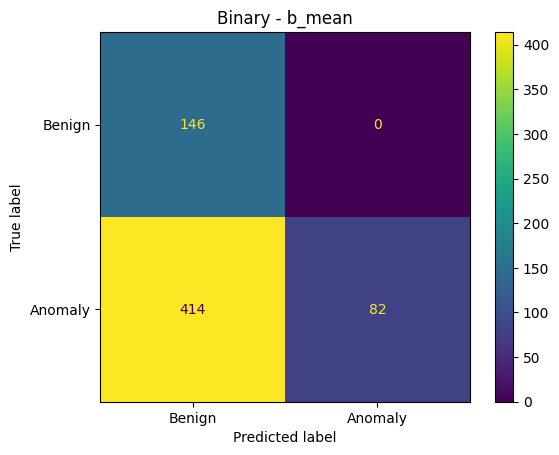

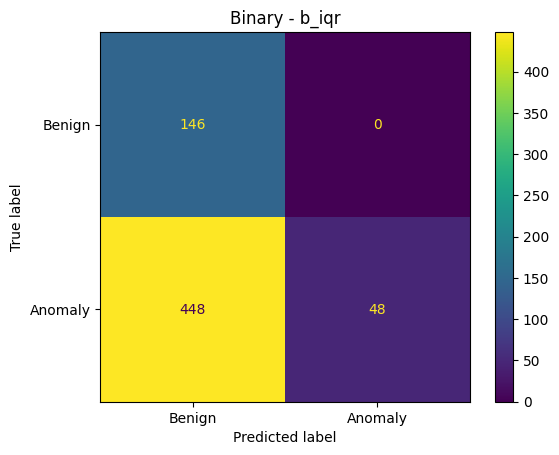

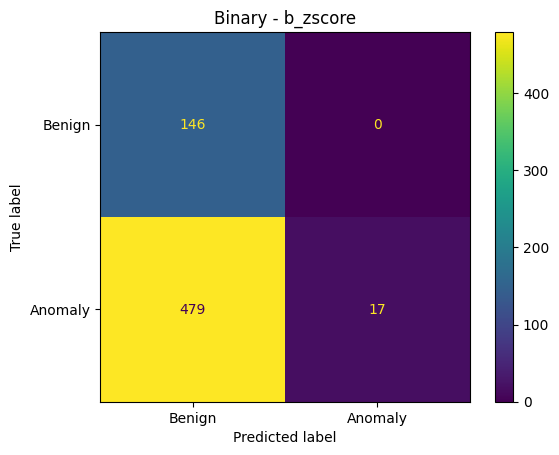

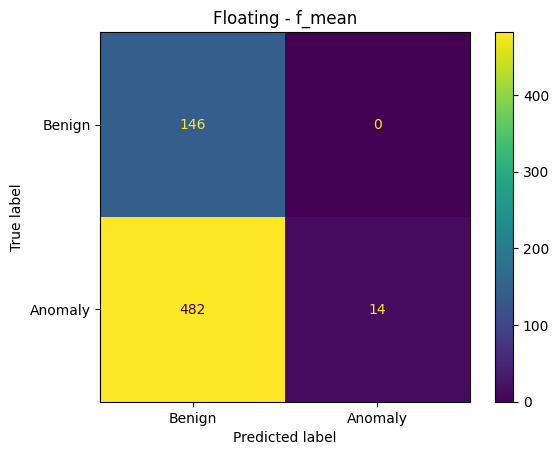

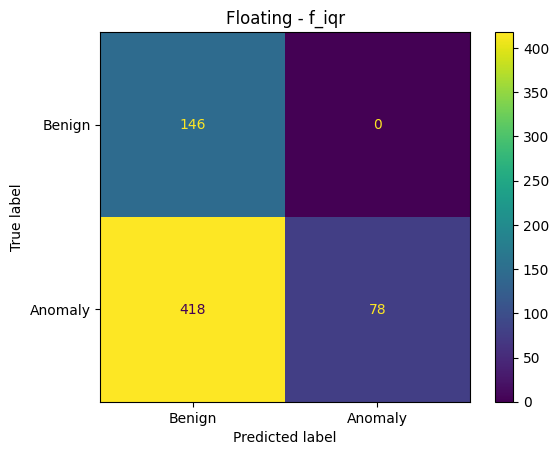

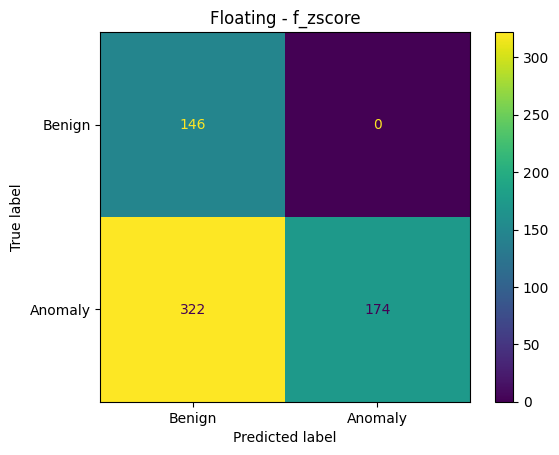

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.1984511132623427
F2-Binary-b_iqr: 0.11811023622047244
F2-Binary-b_zscore: 0.04247876061969016
F2-Floating-f_mean: 0.035035035035035036
F2-Floating-f_iqr: 0.18913676042677013
F2-Floating-f_zscore: 0.4031510658016682


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.0
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.35514018691588783
Accuracy-Binary-b_iqr: 0.30218068535825543
Accuracy-Binary-b_zscore: 0.2538940809968847
Accuracy-Floating-f_mean: 0.24922118380062305
Accuracy-Floating-f_iqr: 0.34890965732087226
Accuracy-Floating-f_zscore: 0.4984423676012461


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.165323,0.198451,0.0,0.355140
b_iqr,0.096774,0.118110,0.0,0.302181
b_zscore,0.034274,0.042479,0.0,0.253894
f_mean,0.028226,0.035035,0.0,0.249221
f_iqr,0.157258,0.189137,0.0,0.348910
f_zscore,0.350806,0.403151,0.0,0.498442


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl